**3.**  In the first cell of your notebook, import the required packages with their customary aliases as follows:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**4.** Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. After reading it in, inspect the first 10 rows and then inspect the last 10 rows.

In [4]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")

In [5]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [6]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


**5.** Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
gdp_df = ( 
    gdp_df
    .drop(columns=['Value Footnotes'])
    .rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
)

**6.** How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [10]:
gdp_df.shape

(7662, 3)

In [11]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [12]:
gdp_df['Year'] = gdp_df['Year'].astype(str)

**7.** Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [14]:
gdp_df['Year'].value_counts().sort_values()

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2022    232
2000    233
2001    234
2002    235
2003    235
2005    236
2004    236
2007    237
2006    237
2008    238
2009    239
2010    239
2011    240
2012    240
2021    241
2019    242
2018    242
2017    242
2020    242
2015    242
2014    242
2016    242
2013    242
Name: count, dtype: int64

**There were generally increasing observations until 2022 where it decreased to 232 observations and the dataset subsequently ends.**

**8.** How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [17]:
gdp_df['Country'].value_counts(ascending = True)

Country
Djibouti                     10
Somalia                      10
Turks and Caicos Islands     12
Sint Maarten (Dutch part)    14
Kosovo                       15
                             ..
Jamaica                      33
Japan                        33
Jordan                       33
IDA total                    33
Zimbabwe                     33
Name: count, Length: 242, dtype: int64

**There are 242 countries, territories, or groups observed in the dataset. Most of the larger or more developed countries have more observations recorded.**

**9.** Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_20121.

In [20]:
gdp_2021 = gdp_df[gdp_df['Year'] == '2021'].reset_index(drop=True)

**10.** Use .describe() to find the summary statistics for GDP per capita in 2021.

In [22]:
gdp_2021.describe()

,GDP_Per_Capita
count,241.000000
mean,20711.570080
std,20916.978968
min,714.066712
25%,5044.196028
50%,13754.802423
75%,30974.370692
max,115683.493708


**11.** Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

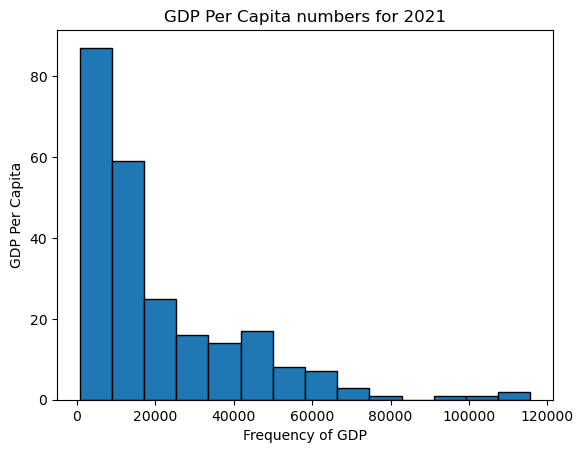

In [24]:
plt.hist(
    data=gdp_2021,
    x='GDP_Per_Capita',
        edgecolor='black',
    linewidth=1,
    bins="auto"
)
plt.xlabel('Frequency of GDP')                            
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita numbers for 2021');

**12.** Find the top 5 countries and bottom 5 countries by GDP per capita in 2021.

In [26]:
gdp_2021.nlargest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
130,Luxembourg,2021,115683.493708
192,Singapore,2021,107741.118436
102,Ireland,2021,102785.490239
180,Qatar,2021,92862.571798
21,Bermuda,2021,78570.489515


In [27]:
gdp_2021.nsmallest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
30,Burundi,2021,714.066712
38,Central African Republic,2021,837.504686
51,Dem. Rep. Congo,2021,1073.643271
198,Somalia,2021,1136.735989
159,Niger,2021,1186.576809


**13.** Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [29]:
gdp_df['Year'] = gdp_df['Year'].astype(int)
gdp_pivoted = gdp_df[gdp_df['Year'].isin([1990, 2021])]

In [30]:
gdp_pivoted = gdp_pivoted.pivot_table(values='GDP_Per_Capita', index= 'Country', columns= 'Year').dropna()

**14.** Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [32]:
gdp_pivoted = gdp_pivoted.assign(Percent_Change=((gdp_pivoted[2021] - gdp_pivoted[1990]) / gdp_pivoted[1990]) * 100)

**15.** How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [34]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].sort_values(by='Percent_Change').count()

Year
1990              19
2021              19
Percent_Change    19
dtype: int64

**16.** Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

In [36]:
gdp_pivoted['Percent_Change'].sort_values(ascending = True)

Country
Burundi                                         -39.236385
Dem. Rep. Congo                                 -38.654906
Congo                                           -35.406695
United Arab Emirates                            -34.147317
Central African Republic                        -30.243599
                                                  ...     
Myanmar                                         593.351678
East Asia & Pacific (IDA & IBRD)                602.726652
East Asia & Pacific (excluding high income)     603.268440
China                                          1140.082904
Equatorial Guinea                              1463.081870
Name: Percent_Change, Length: 206, dtype: float64

In [37]:
eg_df = gdp_df[gdp_df['Country'] == 'Equatorial Guinea']
eg_df = eg_df[(eg_df['Year'] >= 1990) & (eg_df['Year'] <= 2021)]

In [38]:
china_df = gdp_df[gdp_df['Country'] == 'China']
china_df = china_df[(china_df['Year'] >= 1990) & (china_df['Year'] <= 2021)]

In [39]:
eg_df.set_index('Year', inplace=True)
china_df.set_index('Year', inplace=True)

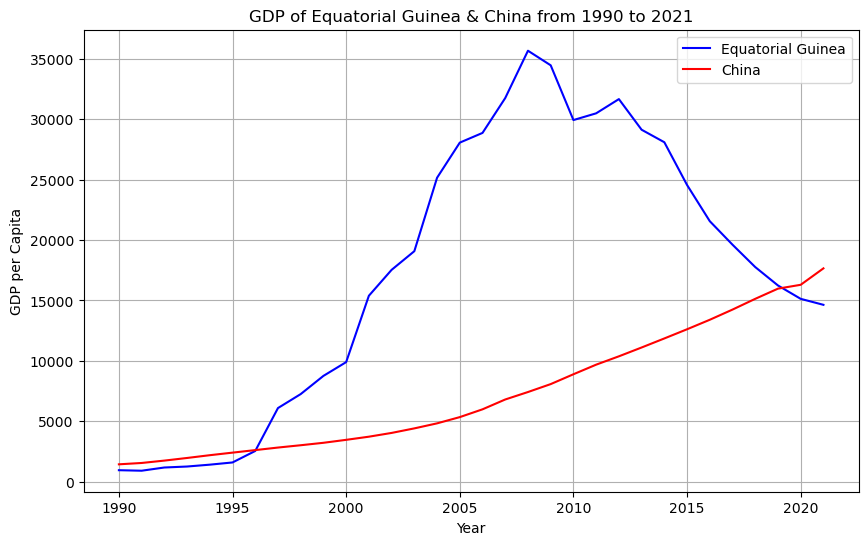

In [40]:
plt.figure(figsize=(10, 6))
eg_df.plot(kind='line', y='GDP_Per_Capita', ax=plt.gca(), label='Equatorial Guinea', color='blue')
china_df.plot(kind='line',y='GDP_Per_Capita', ax=plt.gca(), label='China', color='red')
plt.title('GDP of Equatorial Guinea & China from 1990 to 2021')
plt.xlabel('Year'), plt.ylabel('GDP per Capita')
plt.legend()
plt.grid()

**17.** Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [42]:
continents = pd.read_csv("../data/continents.csv")

**18.** Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [44]:
gdp_df = pd.merge(gdp_df, continents, on='Country', how='inner')

**19.** Determine the number of countries per continent. Create a bar chart showing this.

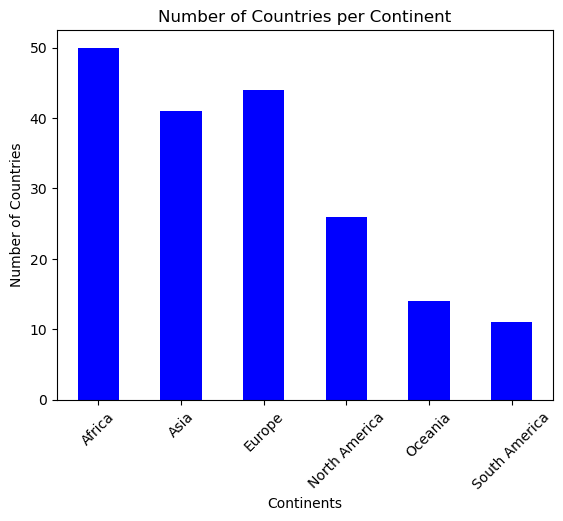

In [46]:
continent_country_df = gdp_df.groupby('Continent')['Country'].nunique()

continent_country_df.plot(kind='bar', color='blue')
plt.xlabel('Continents')
plt.ylabel('Number of Countries')
plt.title('Number of Countries per Continent')
plt.xticks(rotation=45);

**20.** Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

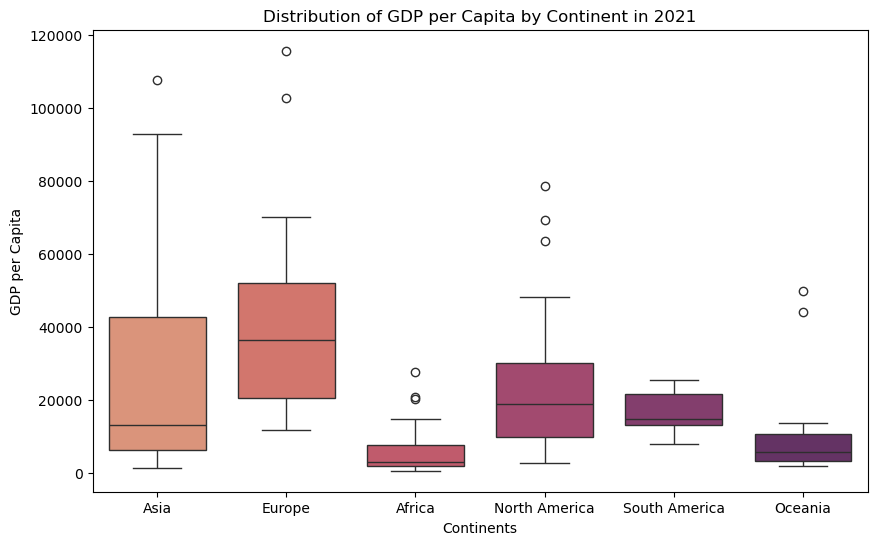

In [48]:
boxplot_continent = pd.merge(gdp_2021, continents, on = 'Country', how= 'inner')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Continent', y='GDP_Per_Capita', width= 0.75,
            hue ='Continent', data=boxplot_continent, palette='flare')
plt.xlabel('Continents')
plt.ylabel('GDP per Capita')
plt.title('Distribution of GDP per Capita by Continent in 2021')
plt.xticks(rotation=0);

**Europe and North America have relatively normal distributions, while the rest of the continents are right-skewed.** 

**21.** Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. Modify your read_csv call to correct this without modifying the original csv file.

**22.** Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

In [52]:
life_expectancy = pd.read_csv("../data/life_expectancy.csv",skiprows=3)

life_expectancy = life_expectancy.drop(['Country Code', 'Indicator Code', 'Indicator Name'],axis=1)

In [53]:
life_expectancy = (
    life_expectancy
    .melt(id_vars='Country Name', var_name='Year', value_name= 'Life Expectancy')
    .rename(columns = {'Country Name': 'Country'})
)

**23.** What was the first country with a life expectancy to exceed 80?

In [55]:
#Convert column Life Expectancy to int from .melt() since it made the new column an object since it contained NaNs
life_expectancy['Life Expectancy'] = pd.to_numeric(life_expectancy['Life Expectancy'], errors='coerce')

In [56]:
life_expectancy[life_expectancy['Life Expectancy'] >80].sort_values('Year')

,Country,Year,Life Expectancy
9695,Japan,1996,80.219756
9926,Gibraltar,1997,80.343000
9938,"Hong Kong SAR, China",1997,80.112195
9961,Japan,1997,80.424146
9988,"Macao SAR, China",1997,80.162000
...,...,...,...
16576,Gibraltar,2022,82.830000
16581,Greece,2022,80.636585
16588,"Hong Kong SAR, China",2022,83.660976
16550,Denmark,2022,81.304878


**24.** Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [58]:
life_expectancy = life_expectancy[life_expectancy['Year'] != 'Unnamed: 68']

In [59]:
life_expectancy['Year'] = life_expectancy['Year'].astype(int)

In [60]:
gdp_le = pd.merge(
    left = gdp_df,
    right = life_expectancy)
gdp_le.head(5)

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


**25.** Create a new DataFrame, named gdp_le_2021 by extracting data for the year 2021 from gdp_le. How many countries have a life expectancy of at least 80 in 2021?

In [62]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021].copy()
(gdp_le_2021['Life Expectancy'] >= 80).sum()

31

**26.** Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [64]:
top_3_gdp = gdp_le_2021.nlargest(3,'GDP_Per_Capita')['Country']

In [65]:
gdp_le[gdp_le['Country'].isin(top_3_gdp)]

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
2298,Ireland,2022,113870.785550,Europe,83.056098
2299,Ireland,2021,102785.490239,Europe,82.353659
2300,Ireland,2020,91356.855054,Europe,82.556098
2301,Ireland,2019,86925.906582,Europe,82.702439
2302,Ireland,2018,83575.599241,Europe,82.204878
...,...,...,...,...,...
4450,Singapore,1994,46865.416894,Asia,76.197561
4451,Singapore,1993,43528.860736,Asia,76.046341
4452,Singapore,1992,40054.049796,Asia,75.946341
4453,Singapore,1991,38705.653871,Asia,75.646341


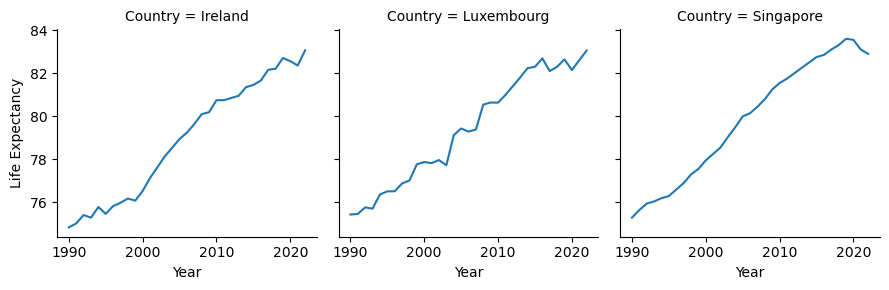

In [66]:
top_3_lineplot = sns.FacetGrid(gdp_le[gdp_le['Country'].isin(top_3_gdp)], col="Country")
top_3_lineplot.map(sns.lineplot, "Year", "Life Expectancy");

**27.** Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

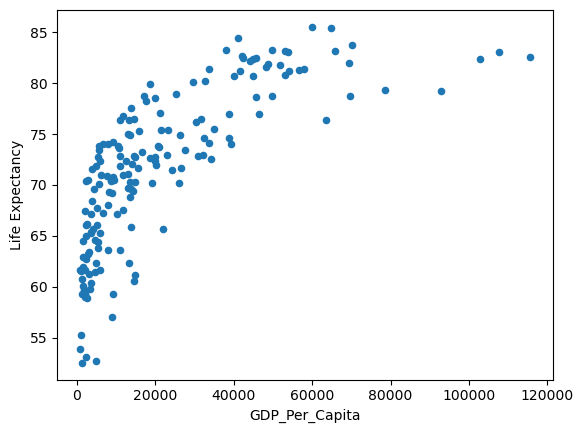

In [68]:
gdp_le_2021.plot(kind='scatter', x='GDP_Per_Capita', y='Life Expectancy');

**28.** Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

In [70]:
gdp_le_2021.corr(numeric_only=True)

,Year,GDP_Per_Capita,Life Expectancy
Year,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.745081
Life Expectancy,NaN,0.745081,1.000000


**The correlation coefficient (r) describes the strength of the relationship between life expectancy and GDP per capita. It is closer to 1 so it demonstrates a stronger positive relationship.**

**29.** Add a column to gdp_le_2021 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [73]:
gdp_le_2021['Log_GDP_Per_Capita'] = np.log(gdp_le_2021['GDP_Per_Capita'])

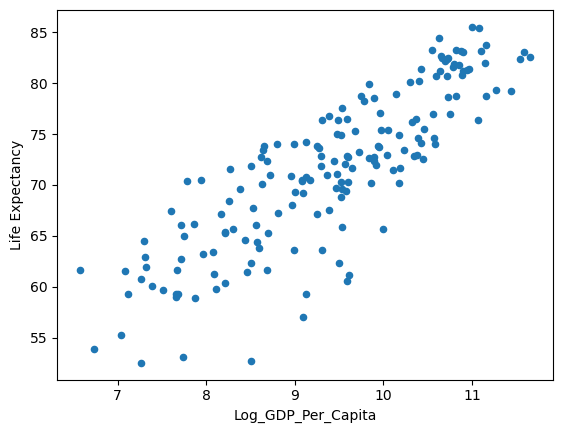

In [74]:
gdp_le_2021.plot(kind='scatter', x='Log_GDP_Per_Capita', y='Life Expectancy');

**The log of GDP per capita helps to visualize this relationship more accurrately since it compresses the scale compared to using actual values.**